In [5]:
# EDA on housing dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing = pd.read_csv('datasets/housing/housing.csv')



In [6]:
# now that we have the data , let's perform some basic EDD

# let's see the first 5 rows of the data
print(housing.head())

# let's see the shape of the data
print(housing.shape)

# let's see the columns of the data
print(housing.columns)



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)
Index(['longitude', 'latitude', 'housing_median_age', 'total_ro

In [ ]:
# 📊 Advanced Exploratory Data Analysis (EDA)
# Let's dive deeper into our housing dataset with more sophisticated analysis

# 📝 Basic Statistical Analysis
# Let's examine the core statistics and information about our dataset
print(housing.describe())  # Get statistical summary
print(housing.info())      # Get dataset info

# 🔄 Data Type Conversion
# Converting categorical data to numeric for analysis
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category')
housing['ocean_proximity'] = housing['ocean_proximity'].cat.codes

# 📈 Correlation Analysis
# Understanding relationships between variables
print(housing.corr())

# 🌡️ Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 📊 Distribution Analysis
# Visualizing the distribution of all numerical variables
print(housing.hist(bins=50, figsize=(20,15)))

# 🔄 Pairwise Relationships
# Creating pairwise plots to see relationships between variables
print(sns.pairplot(housing))

# 🗺️ Geographic Distribution of House Values
# Basic scatter plot showing house values across locations
print(sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=housing))

# 🌎 3D Visualization of Location vs Price
# Creating an advanced 3D visualization of house prices based on location
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(housing['longitude'], 
                    housing['latitude'], 
                    housing['median_house_value'],
                    c=housing['median_house_value'],
                    cmap='viridis')
plt.colorbar(scatter)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude') 
ax.set_zlabel('Median House Value')
plt.title('3D Visualization of House Prices by Location')
plt.show()

# 🌊 Ocean Proximity Analysis
# Box plot showing house value distribution by ocean proximity
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing)
plt.xticks(rotation=45)
plt.title('House Values by Ocean Proximity')
plt.show()

# 🏠 Housing Age Analysis
# Distribution of housing ages in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=housing, x='housing_median_age', bins=30)
plt.title('Distribution of Housing Age')
plt.show()

# 💰 Income vs House Value Analysis
# Examining the relationship between income and house prices
plt.figure(figsize=(10, 6))
sns.regplot(x='median_income', y='median_house_value', data=housing, scatter_kws={'alpha':0.5})
plt.title('House Value vs Median Income')
plt.show()

# 🏘️ Room Statistics Analysis
# Analyzing relationships between room-related features
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.scatterplot(data=housing, x='total_rooms', y='total_bedrooms')
plt.title('Total Rooms vs Bedrooms')

plt.subplot(132)
sns.scatterplot(data=housing, x='total_rooms', y='households')
plt.title('Total Rooms vs Households')

plt.subplot(133)
sns.scatterplot(data=housing, x='total_bedrooms', y='households')
plt.title('Total Bedrooms vs Households')
plt.tight_layout()
plt.show()

# 📊 Key Statistical Insights
print("\n📈 Interesting Statistics:")
print(f"🏠 Average rooms per household: {housing['total_rooms'].mean() / housing['households'].mean():.2f}")
print(f"🛏️ Average bedrooms per household: {housing['total_bedrooms'].mean() / housing['households'].mean():.2f}")
print(f"💵 Average house value per room: ${housing['median_house_value'].mean() / housing['total_rooms'].mean():.2f}")

# let's do plotting on a earth map
# 🗺️ Plotting Housing Data on US Map

import folium
from folium import plugins

# Create a base map centered on California
california_coords = [36.7783, -119.4179]
m = folium.Map(location=california_coords, 
               zoom_start=6,
               tiles='CartoDB positron')

# Create a list of locations
locations = housing[['latitude', 'longitude']].values.tolist()
house_prices = housing['median_house_value'].tolist()

# Create a heatmap layer
heatmap_data = [[loc[0], loc[1], price] for loc, price in zip(locations, house_prices)]
plugins.HeatMap(heatmap_data).add_to(m)

# Add a few markers for major cities for reference
folium.Marker(
    [37.7749, -122.4194],
    popup='San Francisco'
).add_to(m)

folium.Marker(
    [34.0522, -118.2437],
    popup='Los Angeles'
).add_to(m)

folium.Marker(
    [38.5816, -121.4944],
    popup='Sacramento'
).add_to(m)

# Display the map
m.save('housing_map.html')







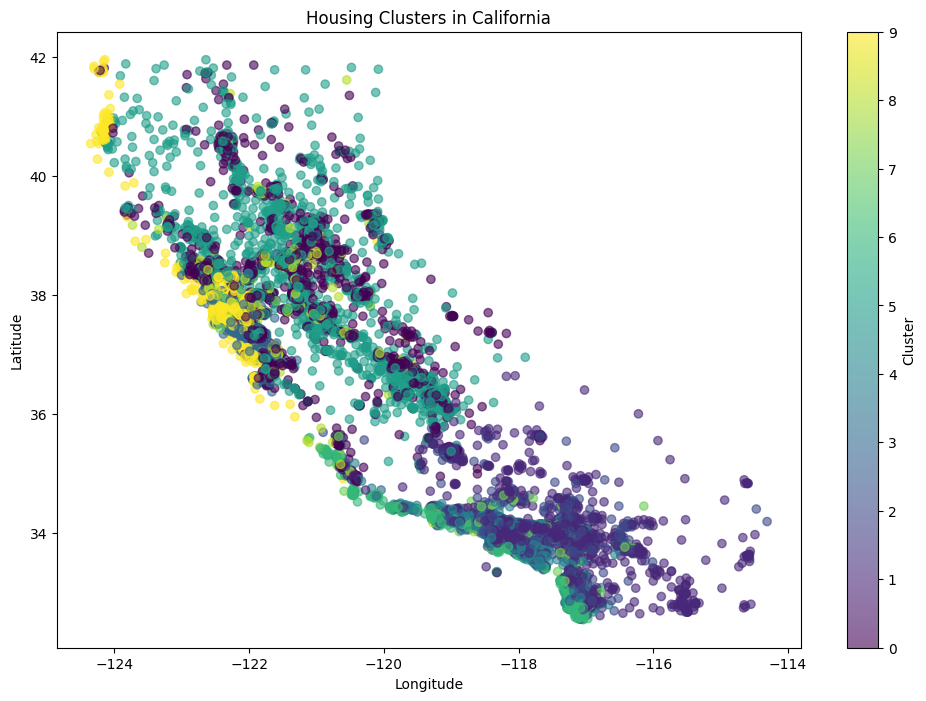

In [14]:
# 🔄 Data Preprocessing for Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# First, handle missing values
imputer = SimpleImputer(strategy='median')
housing_imputed = imputer.fit_transform(housing)

# Then scale the data
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_imputed)

# Now we can perform clustering
kmeans = KMeans(n_clusters=10, random_state=42)
housing_clusters = kmeans.fit_predict(housing_scaled)

# Add clusters back to the original dataframe for visualization
housing['Cluster'] = housing_clusters

# 📊 Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(housing['longitude'], 
           housing['latitude'], 
           c=housing_clusters, 
           cmap='viridis', 
           alpha=0.6)
plt.title('Housing Clusters in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

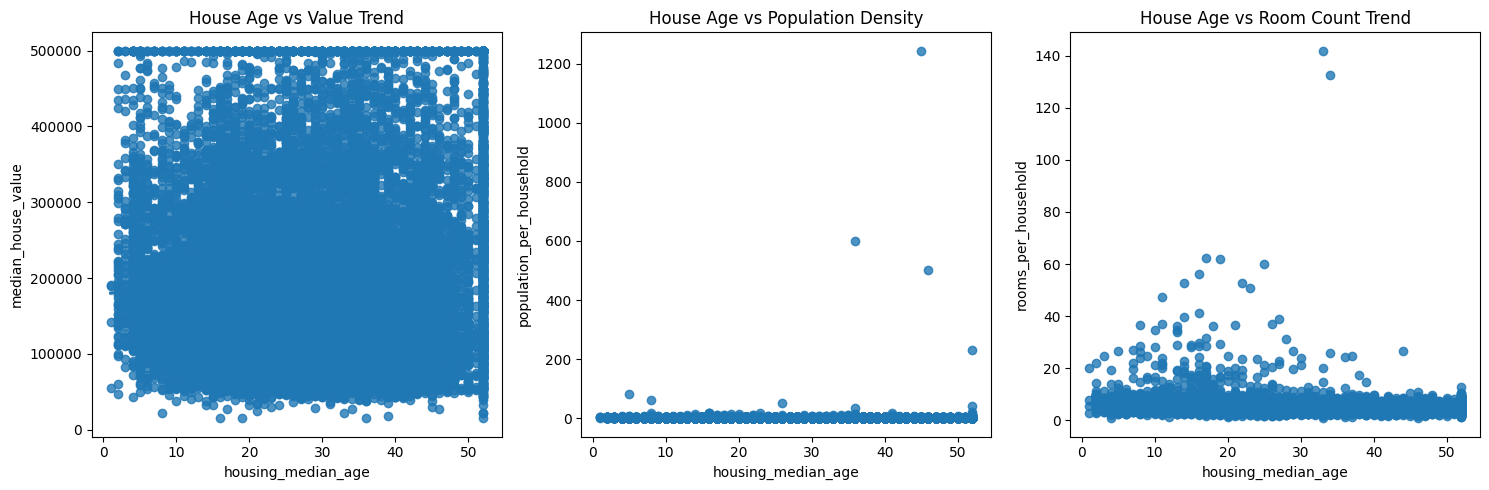

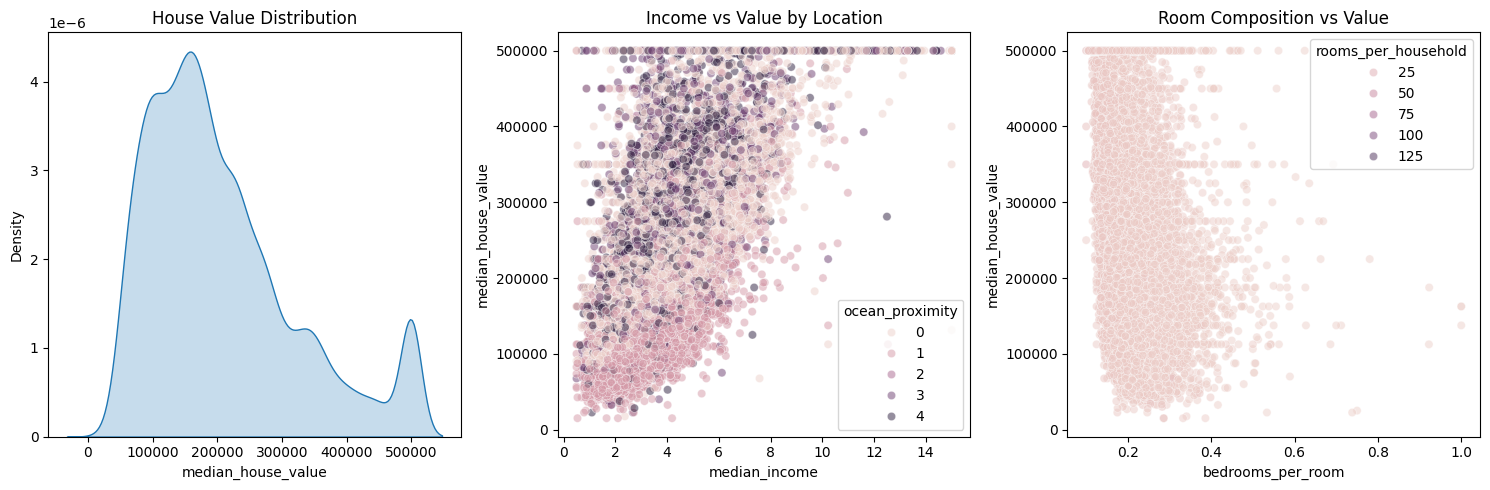


📊 Trend Analysis Insights:
🏠 Correlation between age and value: 0.11
💰 Correlation between income and value: 0.69
🌊 Average house value by ocean proximity:
ocean_proximity
2    380440.000000
3    259212.311790
4    249433.977427
0    240084.285464
1    124805.392001
Name: median_house_value, dtype: float64


In [15]:
# let's work with trends
# 📈 Trend Analysis

# Create some derived features for trend analysis
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

# 1. Time-based Analysis with Housing Age
plt.figure(figsize=(15, 5))

# Age vs House Value
plt.subplot(131)
sns.regplot(x='housing_median_age', y='median_house_value', data=housing)
plt.title('House Age vs Value Trend')

# Age vs Population Density
plt.subplot(132)
sns.regplot(x='housing_median_age', y='population_per_household', data=housing)
plt.title('House Age vs Population Density')

# Age vs Rooms per Household
plt.subplot(133)
sns.regplot(x='housing_median_age', y='rooms_per_household', data=housing)
plt.title('House Age vs Room Count Trend')
plt.tight_layout()
plt.show()

# 2. Value Distribution Analysis
plt.figure(figsize=(15, 5))

# House Value Distribution
plt.subplot(131)
sns.kdeplot(data=housing['median_house_value'], fill=True)
plt.title('House Value Distribution')

# Income vs House Value by Ocean Proximity
plt.subplot(132)
sns.scatterplot(data=housing, x='median_income', y='median_house_value', 
                hue='ocean_proximity', alpha=0.5)
plt.title('Income vs Value by Location')

# Room Ratio Analysis
plt.subplot(133)
sns.scatterplot(data=housing, x='bedrooms_per_room', y='median_house_value', 
                hue='rooms_per_household', alpha=0.5)
plt.title('Room Composition vs Value')
plt.tight_layout()
plt.show()

# 3. Print Key Trend Insights
print("\n📊 Trend Analysis Insights:")
print(f"🏠 Correlation between age and value: {housing['housing_median_age'].corr(housing['median_house_value']):.2f}")
print(f"💰 Correlation between income and value: {housing['median_income'].corr(housing['median_house_value']):.2f}")
print(f"🌊 Average house value by ocean proximity:")
print(housing.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False))

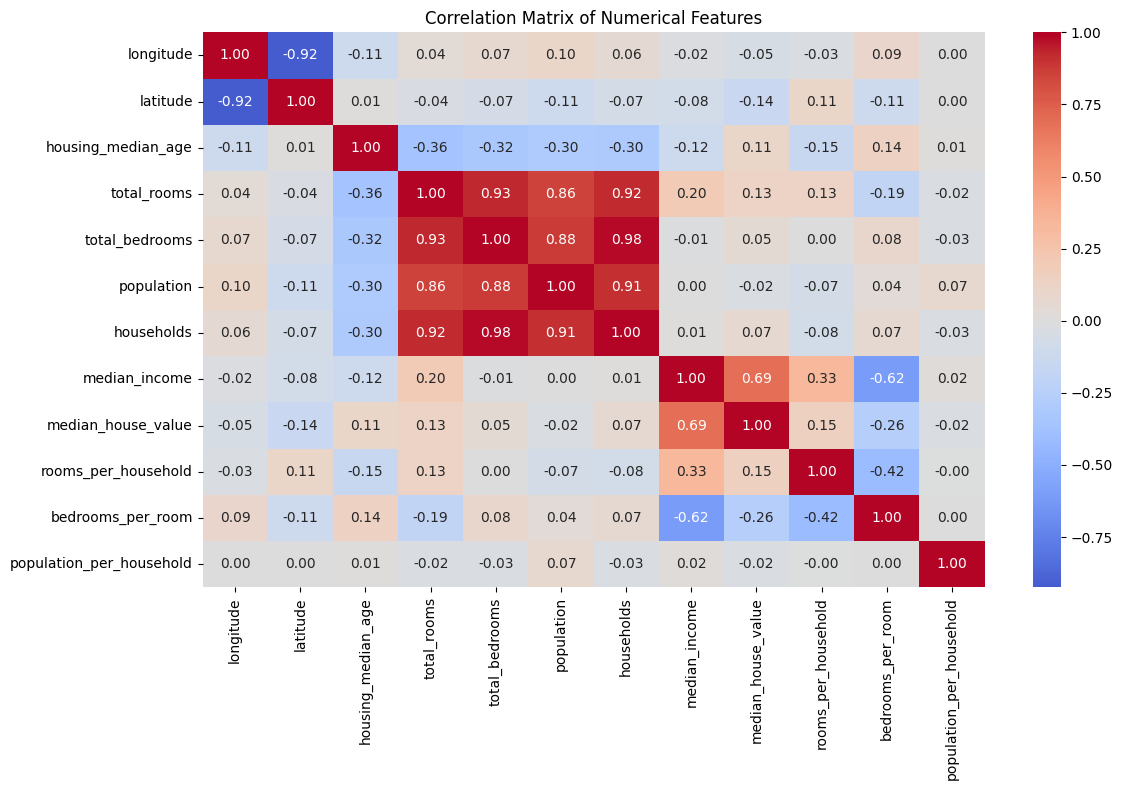


🔍 Top Feature Correlations:
households      total_bedrooms    0.979728
total_bedrooms  total_rooms       0.930380
latitude        longitude        -0.924664
households      total_rooms       0.918484
                population        0.907222


In [16]:
# 4. Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = housing.select_dtypes(include=['float64', 'int64']).corr()

# Create a heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\n🔍 Top Feature Correlations:")
# Get the upper triangle of correlations
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Find strongest correlations
strongest_correlations = upper.unstack()
sorted_correlations = strongest_correlations.sort_values(key=abs, ascending=False)
# Print top 5 correlations
print(sorted_correlations[:5].to_string())
